<h1><center> Taxi Tip Prediction </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, the data set includes information about taxi tip and was collected and provided to the NYC Taxi and Limousine Commision (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). Sevearl ML models would be used to predict the amount of tip paid. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
                <li>Tranform Data</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Describe</li>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Decision Tree Regression</li>
                <li>Linear Regression</li>
                <li>Polynomial Regression</li>
                <li>Ridge Regression</li>           
            </ul>
        </li>
    </ul>
</div>

<hr>

This dataset is publicly available here: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.(all rights reserved by Taxi & Limousine Commission(TLC), City of New York). The TLC Yellow Taxi Trip Records of June, 2019 are used here. 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv'

In [3]:
#download the data
taxi_data = pd.read_csv(path)

In [4]:
NR = np.size(taxi_data, 0)
NC = np.size(taxi_data, 1)
print('There are ', NR, ' rows of data and ', NC, ' properties')

There are  3936004  rows of data and  18  properties


In [5]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


Each row in the dataset represents a taxi trip. As shown above, each row has 18 variables. The variable "tip_amount" represents the target variable. 

## 2. Data Wrangling

In [6]:
#reducint the data size to 100000 records
taxi_data = taxi_data.head(100000)

In [7]:
#Evaluating the missing data
missing_data = taxi_data.isnull()
missing_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


It looks like there is no missing data.

In [8]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  float64
 4   trip_distance          100000 non-null  float64
 5   RatecodeID             100000 non-null  float64
 6   store_and_fwd_flag     100000 non-null  object 
 7   PULocationID           100000 non-null  float64
 8   DOLocationID           100000 non-null  float64
 9   payment_type           100000 non-null  float64
 10  fare_amount            100000 non-null  float64
 11  extra                  100000 non-null  float64
 12  mta_tax                100000 non-null  float64
 13  tip_amount             100000 non-null  float64
 14  tolls_amount           100000 non-nul

In [9]:
taxi_data['tip_amount'].value_counts()

tip_amount
0.00     34537
1.00      6059
2.00      3652
1.96      1295
2.06      1272
         ...  
6.57         1
10.76        1
81.92        1
13.50        1
8.02         1
Name: count, Length: 1128, dtype: int64

There are 34537 tip amounts at 0, which is assumed that there tips were paid in cash. So here drops all those rows. 

In [10]:
taxi_data = taxi_data[taxi_data['tip_amount']>0]

In [11]:
taxi_data['tip_amount'].value_counts()

tip_amount
1.00     6059
2.00     3652
1.96     1295
2.06     1272
1.86     1263
         ... 
12.66       1
14.86       1
15.30       1
13.88       1
8.02        1
Name: count, Length: 1125, dtype: int64

In [12]:
NR = np.size(taxi_data, 0)
NC = np.size(taxi_data, 1)
print('There are ', NR, ' rows of data and ', NC, ' properties')

There are  65460  rows of data and  18  properties


We also need to remove outliers, namely where those tip were larger than the fare cost.

In [13]:
taxi_data = taxi_data[taxi_data['tip_amount'] <= taxi_data['fare_amount']]

Next, we remove trips with very large fare cost.

In [14]:
taxi_data = taxi_data[(taxi_data['fare_amount'] >=2) & (taxi_data['fare_amount'] < 200)]

Here drop the 'total amount' column.

In [15]:
taxi_data.drop(['total_amount'], axis=1, inplace=True)

We need to convert the "tpep_dropoff_datetime" and "tpep_pickup_datetime" to trip time. 

In [16]:
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

In [17]:
# extract pickup and dropoff hour
taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour
taxi_data['dropoff_hour'] = taxi_data['tpep_dropoff_datetime'].dt.hour

# extract pickup and dropoff day of week
taxi_data['pickup_day'] = taxi_data['tpep_pickup_datetime'].dt.weekday
taxi_data['dropoff_day'] = taxi_data['tpep_dropoff_datetime'].dt.weekday

In [18]:
# compute trip time in minutes
taxi_data['trip_time'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).astype('timedelta64[s]').dt.total_seconds()

In [19]:
# drop the pickup and dropoff datetimes
taxi_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [20]:
NR = np.size(taxi_data, 0)
NC = np.size(taxi_data, 1)
print('There are ', NR, ' rows of data and ', NC, ' properties')

There are  65349  rows of data and  20  properties


In [21]:
# some features are categorical, we need to encode them
# to encode them we use one-hot encoding from the Pandas package
get_dummy_col = ["VendorID","RatecodeID","store_and_fwd_flag","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
taxi_data = pd.get_dummies(taxi_data, columns = get_dummy_col)

In [22]:
taxi_data.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,...,pickup_day_0,pickup_day_3,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_0,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
4,1.0,1.70,9.5,3.0,0.5,2.65,0.0,0.3,2.5,737.0,...,False,False,False,True,False,False,False,False,True,False
5,2.0,1.60,9.5,3.0,0.5,1.00,0.0,0.3,2.5,652.0,...,False,False,False,True,False,False,False,False,True,False
7,2.0,1.20,7.5,3.0,0.5,1.00,0.0,0.3,2.5,488.0,...,False,False,False,True,False,False,False,False,True,False
9,1.0,8.60,31.5,3.0,0.5,7.05,0.0,0.3,2.5,2041.0,...,False,False,False,True,False,False,False,False,True,False
10,1.0,1.74,11.0,0.5,0.5,2.96,0.0,0.3,2.5,858.0,...,False,False,False,True,False,False,False,False,True,False


## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. 

In [60]:
#calcualte correlation
taxi_data.corr(numeric_only=True)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,...,pickup_day_0,pickup_day_3,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_0,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
passenger_count,1.000000,-0.000209,0.002202,-0.175310,0.001385,0.004420,-0.002707,0.001048,0.004190,0.009188,...,-0.003247,-0.004592,0.002695,-0.001389,-0.001874,-0.003247,-0.004592,-0.003423,-0.002695,0.007586
trip_distance,-0.000209,1.000000,0.913802,-0.042103,-0.160758,0.805547,0.598441,0.008575,-0.192397,0.131237,...,0.029662,-0.003556,-0.000230,-0.004055,0.021707,0.029662,-0.003556,-0.006354,-0.006856,0.009453
fare_amount,0.002202,0.913802,1.000000,-0.054693,-0.315826,0.858791,0.602940,-0.038420,-0.229164,0.131027,...,0.025905,-0.004074,0.002818,-0.007421,0.035285,0.025905,-0.004074,-0.006471,-0.008691,0.012621
extra,-0.175310,-0.042103,-0.054693,1.000000,0.046316,-0.054908,-0.052441,0.008393,0.171221,-0.031939,...,-0.005706,-0.005428,-0.025293,0.026492,-0.003294,-0.005706,-0.005428,-0.013827,0.033132,-0.029844
mta_tax,0.001385,-0.160758,-0.315826,0.046316,1.000000,-0.268547,-0.366291,0.033092,0.235998,-0.006971,...,0.000480,0.000679,0.004090,-0.004184,0.000277,0.000480,0.000679,0.002184,-0.003755,0.002936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dropoff_day_0,-0.003247,0.029662,0.025905,-0.005706,0.000480,0.022474,0.016687,0.000099,-0.017077,0.003651,...,1.000000,-0.000065,-0.000391,-0.114763,-0.000027,1.000000,-0.000065,-0.000209,-0.127860,-0.000281
dropoff_day_3,-0.004592,-0.003556,-0.004074,-0.005428,0.000679,-0.003713,-0.001989,0.000140,0.002453,-0.001121,...,-0.000065,1.000000,-0.000553,-0.162303,-0.000037,-0.000065,1.000000,-0.000295,-0.180826,-0.000397
dropoff_day_4,-0.003423,-0.006354,-0.006471,-0.013827,0.002184,-0.005612,-0.002980,0.000451,-0.000392,-0.002466,...,-0.000209,-0.000295,0.533888,-0.521955,-0.000121,-0.000209,-0.000295,1.000000,-0.581524,-0.001277
dropoff_day_5,-0.002695,-0.006856,-0.008691,0.033132,-0.003755,-0.001109,-0.003420,-0.000776,0.006937,-0.725867,...,-0.127860,-0.180826,-0.309022,0.351243,-0.073819,-0.127860,-0.180826,-0.581524,1.000000,-0.781892


In [23]:
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time
count,65349.000000,65349.000000,65349.000000,65349.000000,65349.000000,65349.000000,65349.000000,65349.000000,65349.000000,65349.000000
mean,1.587874,3.044421,12.511533,1.018459,0.497503,2.960050,0.317121,0.299936,2.346340,885.832652
std,1.226871,3.614311,10.808110,1.209451,0.035232,2.412929,1.527919,0.004391,0.600319,3629.273930
min,0.000000,0.000000,2.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.100000,6.500000,0.000000,0.500000,1.700000,0.000000,0.300000,2.500000,360.000000
50%,1.000000,1.840000,9.000000,0.500000,0.500000,2.260000,0.000000,0.300000,2.500000,589.000000
75%,2.000000,3.340000,14.000000,2.500000,0.500000,3.260000,0.000000,0.300000,2.500000,943.000000
max,7.000000,63.840000,194.000000,17.500000,0.500000,53.000000,40.170000,0.300000,2.500000,86373.000000


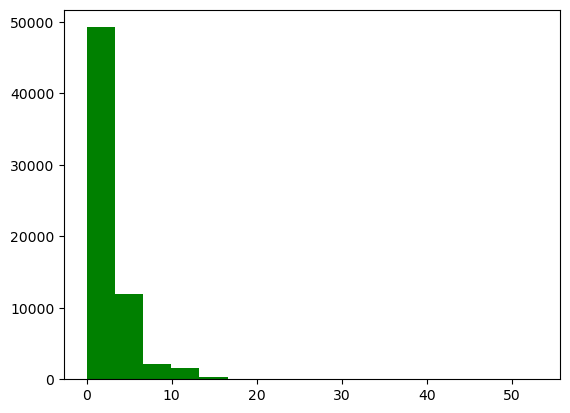

In [24]:
plt.hist(taxi_data.tip_amount.values, 16, histtype='bar', facecolor='g')
plt.show()

In [25]:
print("Minimum amount value is ", np.min(taxi_data.tip_amount.values))
print("Maximum amount value is ", np.max(taxi_data.tip_amount.values))
print("90% of the trips have a tip amount less or equal than ", np.percentile(taxi_data.tip_amount.values, 90))

Minimum amount value is  0.01
Maximum amount value is  53.0
90% of the trips have a tip amount less or equal than  5.15


In [26]:
taxi_data.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,...,pickup_day_0,pickup_day_3,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_0,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
4,1.0,1.70,9.5,3.0,0.5,2.65,0.0,0.3,2.5,737.0,...,False,False,False,True,False,False,False,False,True,False
5,2.0,1.60,9.5,3.0,0.5,1.00,0.0,0.3,2.5,652.0,...,False,False,False,True,False,False,False,False,True,False
7,2.0,1.20,7.5,3.0,0.5,1.00,0.0,0.3,2.5,488.0,...,False,False,False,True,False,False,False,False,True,False
9,1.0,8.60,31.5,3.0,0.5,7.05,0.0,0.3,2.5,2041.0,...,False,False,False,True,False,False,False,False,True,False
10,1.0,1.74,11.0,0.5,0.5,2.96,0.0,0.3,2.5,858.0,...,False,False,False,True,False,False,False,False,True,False


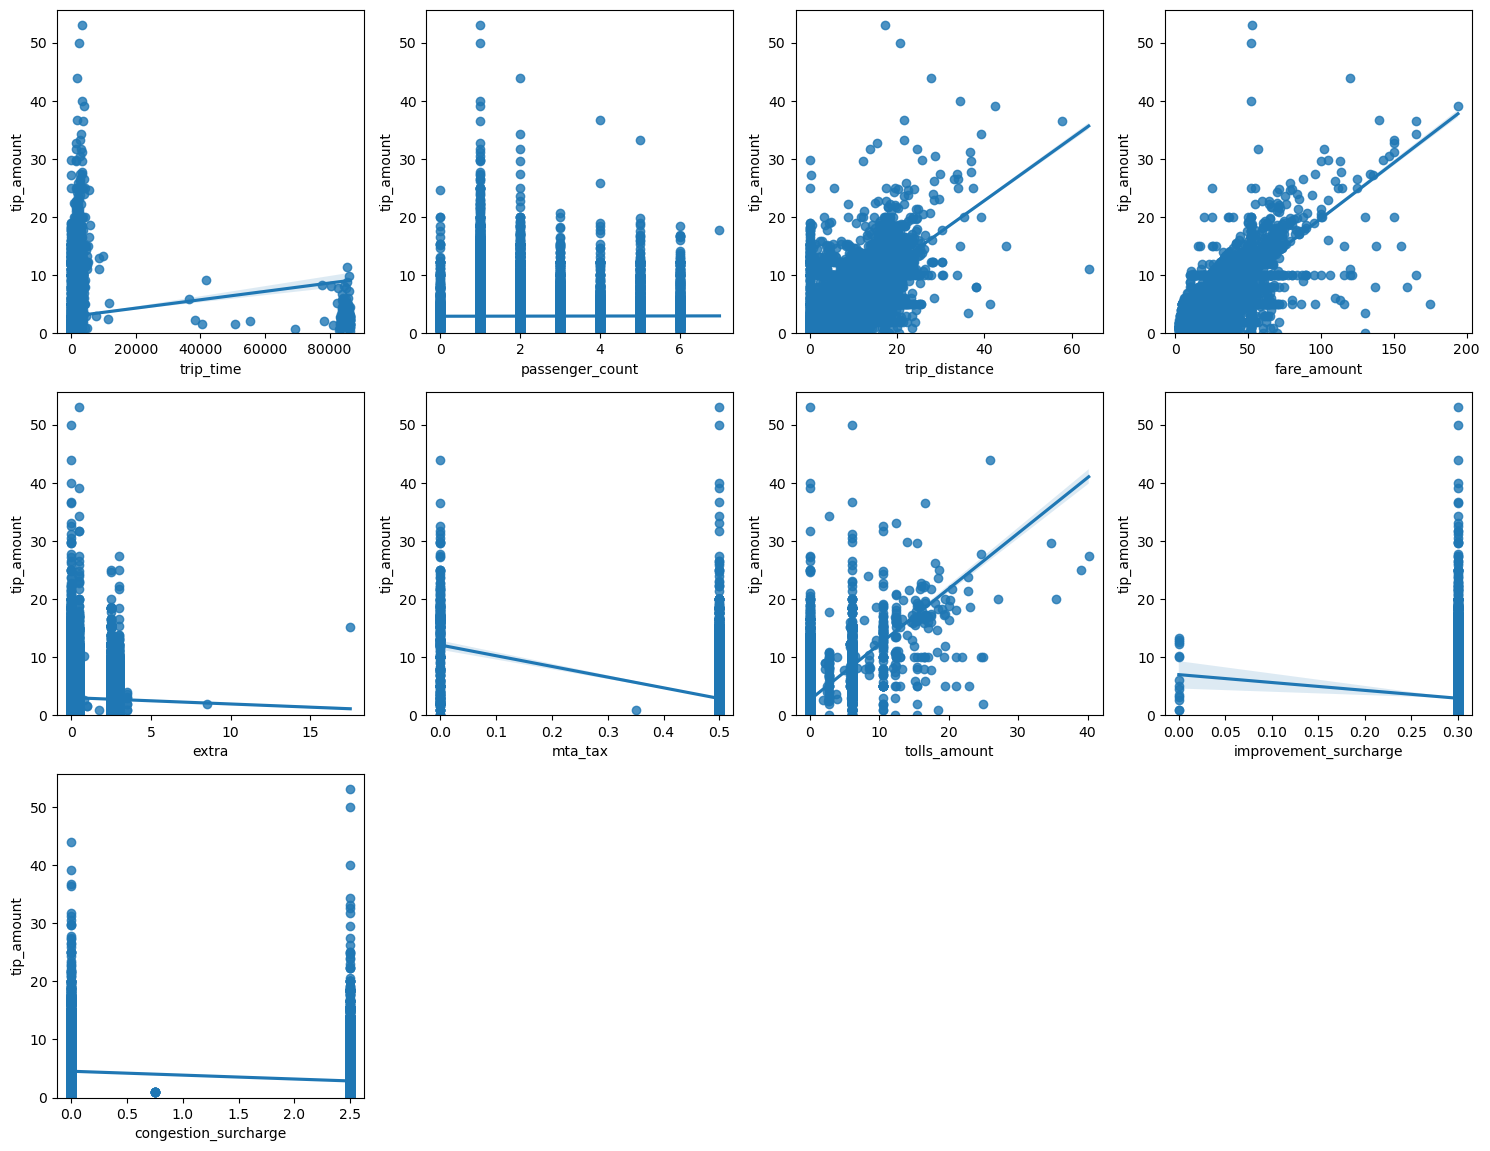

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# use regplot
#trip_time
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
sns.regplot(x='trip_time',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

#passenger_count
plt.subplot(4,4,2)
sns.regplot(x='passenger_count',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

#trip_distance
plt.subplot(4,4,3)
sns.regplot(x='trip_distance',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

#fare_amount
plt.subplot(4,4,4)
sns.regplot(x='fare_amount',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

#extra
plt.subplot(4,4,5)
sns.regplot(x='extra',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

#mta_tax
plt.subplot(4,4,6)
sns.regplot(x='mta_tax',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

# tolls_amount
plt.subplot(4,4,7)
sns.regplot(x='tolls_amount',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

# improvement_surcharge
plt.subplot(4,4,8)
sns.regplot(x='improvement_surcharge',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()

# congestion_surcharge
plt.subplot(4,4,9)
sns.regplot(x='congestion_surcharge',y='tip_amount',data=taxi_data)
plt.ylim(0,)
plt.tight_layout()


From above plots, "trip_distance", "fare_amount", "tolls_amount" are postiviely correlated with "tip_amount". Other variables don't have clear correlation. 

### 4. Model Development

In this section, I will develop a Decision Tree model predict the tip.

In [28]:
tips = taxi_data['tip_amount'].values.astype('float32')
variables = taxi_data.drop(['tip_amount'], axis=1)
X = variables.values
# normalize the feature matrix
X = normalize(X, axis=1, norm='l1',copy=False)

#### 4.0 Decision Tree Regression

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, tips, test_size=0.30, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
DT = DecisionTreeRegressor(max_depth=8, random_state=35)

In [32]:
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

In [33]:
DT_yhat = DT.predict(x_test)

In [34]:
DT_R2 = DT.score(x_test, y_test)
DT_MSE = metrics.mean_squared_error(y_test, DT_yhat)
print('Decision Tree R2 is', round(DT_R2,4))
print('Decision Tree MSE is', round(DT_MSE,4))

Decision Tree R2 is 0.6965
Decision Tree MSE is 1.7599


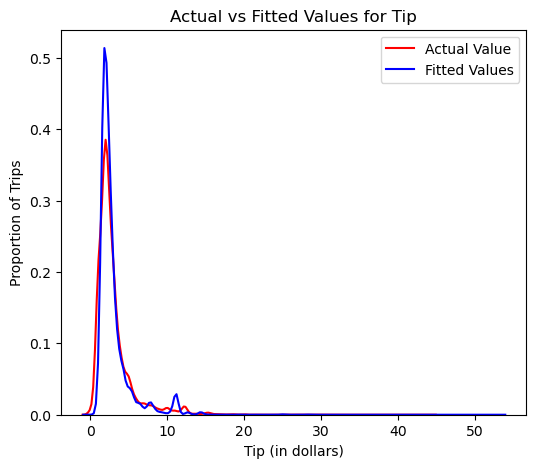

In [35]:
#plot the results
plt.figure(figsize=(6, 5))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(DT_yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Tip')
plt.xlabel('Tip (in dollars)')
plt.ylabel('Proportion of Trips')
plt.legend()
plt.show()
plt.close()

Obviously, decision tree regression is not that good model for this type of prediction.

#### 4.1 Linear Regression

For linear regression, let's just keep the numerical variables.

In [36]:
variables = taxi_data[['passenger_count', 'trip_distance','fare_amount','extra', 'mta_tax', 'tolls_amount','trip_time', 'improvement_surcharge', 'congestion_surcharge']]
lr_tips = taxi_data['tip_amount']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(variables, lr_tips, test_size=0.30, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [39]:
#Let's calcualte the R^2 on the test data
print('The R-square of Linear Regression is: ', round(lm.score(x_test, y_test),4))


The R-square of Linear Regression is:  0.7537


In [40]:
#predict price using test data
lm_predict = lm.predict(x_test)
mse = metrics.mean_squared_error(y_test, lm_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  1.43


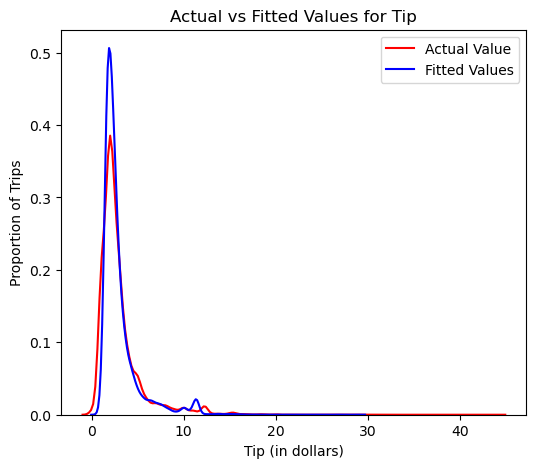

In [41]:
#plot the results
plt.figure(figsize=(6, 5))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lm_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Tip')
plt.xlabel('Tip (in dollars)')
plt.ylabel('Proportion of Trips')
plt.legend()
plt.show()
plt.close()

Linear regression perfomred better than decission tree regression. 

#### 4.2 Polynomial Regression

In [42]:
#import the library
from sklearn.preprocessing import PolynomialFeatures

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',LinearRegression())]

In [45]:
pipe=Pipeline(Input)

In [46]:
#standard scaler takes float as inputs. Let's convert Variables data type.
variables = taxi_data[['trip_distance','fare_amount', 'tolls_amount','trip_time']]
variables = variables.astype(float)
x_train, x_test, y_train, y_test = train_test_split(variables, lr_tips, test_size=0.30, random_state=42)

In [47]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
pr_predict = pipe.predict(x_test)

In [49]:
mse = metrics.mean_squared_error(y_test, pr_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))
print('The R-square of Polynomial Regression is: ', round(pipe.score(x_test, y_test),4))

The mean square error of price and predicted value is:  1.43
The R-square of Polynomial Regression is:  0.7542


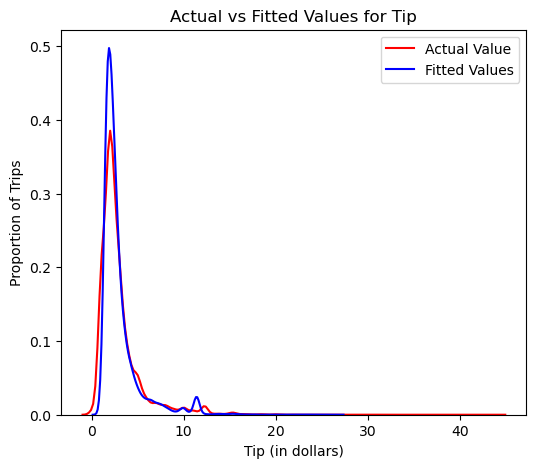

In [50]:
#plot the results
plt.figure(figsize=(6, 5))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pr_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Tip')
plt.xlabel('Tip (in dollars)')
plt.ylabel('Proportion of Trips')
plt.legend()
plt.show()
plt.close()

Polynomial regression gave about the same accuracy as linear regression.

#### 4.3 Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. Here I compare it with other two regressions. I use __GridSearchCV__ to find the best hyperparameter.

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [52]:
#define the parameters
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [53]:
#create ridge regression object
RR = Ridge()

In [54]:
#create a ridge grid search object
grid = GridSearchCV(RR,parameters,cv=4) #cv determines the number of folds. 

In [55]:
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [56]:
BestRR = grid.best_estimator_
BestRR

Ridge(alpha=1000)

In [57]:
# Find the R^2 for ridge regression fit
print('The R-square of Ridge Regression is: ', round(BestRR.score(x_test, y_test),4))

The R-square of Ridge Regression is:  0.7524


In [58]:
tip_ridge = BestRR.predict(x_test)
mse = metrics.mean_squared_error(y_test, tip_ridge)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  1.44


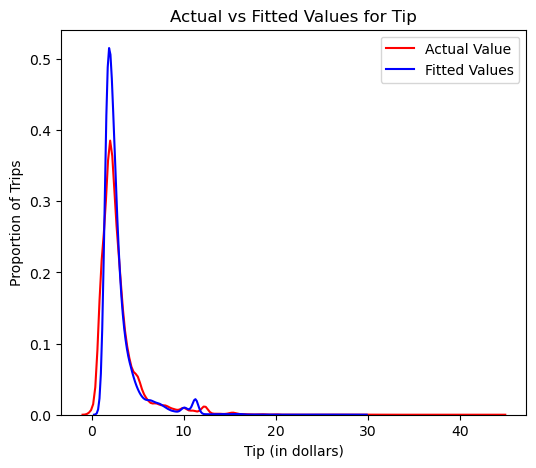

In [59]:
#plot the results
plt.figure(figsize=(6, 5))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(tip_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Tip')
plt.xlabel('Tip (in dollars)')
plt.ylabel('Proportion of Trips')
plt.legend()
plt.show()
plt.close()

Compared all four models,all of the models performed accuracies lower than 80%, which won't be accuracy on predicting tips. This is because there are no hight correlated variabels to tips. 